In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
from sklearn import preprocessing
import folium
#Rodar varias vezes o kmeans para o elbow
#Analisar porcentagem de deficiencias em cada um dos grupos - alto, medio e baixo
#Analisar porcentagem posterior para cada deficiencia
#Tabela com joinha!

In [ ]:
paths = ['/home/joao/Desktop/Faculdade/IC/ProcessedData/2019',
        '/home/joao/Desktop/Faculdade/IC/ProcessedData/2018',
        '/home/joao/Desktop/Faculdade/IC/ProcessedData/2017',
        '/home/joao/Desktop/Faculdade/IC/ProcessedData/2016',
        '/home/joao/Desktop/Faculdade/IC/ProcessedData/2015'
]
Desempenho = ['BAIXO', 'MEDIO', 'ALTO']
Perf_labels = ['LOW', 'AVERAGE', 'HIGH']
NOTAS = ['NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_CN', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
Condicoes = [
'IN_BAIXA_VISAO',
'IN_CEGUEIRA',
'IN_SURDEZ',
'IN_DEFICIENCIA_AUDITIVA',
'IN_SURDO_CEGUEIRA',
'IN_DEFICIENCIA_FISICA',
'IN_DEFICIENCIA_MENTAL',
'IN_DEFICIT_ATENCAO',
'IN_DISLEXIA',
'IN_DISCALCULIA',
'IN_AUTISMO']
plt.rcParams.update({'font.size':18})
ind_especificos = ['IN_SURDEZ', 'IN_DEFICIENCIA_MENTAL', 'IN_DISLEXIA', 'IN_DEFICIT_ATENCAO']

Mnemonico = [
    'LV ',
    'BL ',
    'DF ',
    'HD ',
    'DB ',
    'PD ',
    'MD ',
    'AD ',
    'DYx',
    'DYc',
    'AUT'
]

MnemonicoProva = [
    'Hum. Sc. ',
    'Lang. Cod. ',
    'Nat. Sc. ',
    'Math ',
    'Essay'
]

Lista = ['ND']
Lista += (Mnemonico )


<h1> Analise da porcentagem presente de individuos com alguma condição especial em cada grupo

In [ ]:
clrData = pd.read_csv(paths[0], sep = ',', encoding = 'ISO-8859-1')

2019 IN_BAIXA_VISAO 4305
2019 IN_CEGUEIRA 541
2019 IN_SURDEZ 1188
2019 IN_DEFICIENCIA_AUDITIVA 1660
2019 IN_SURDO_CEGUEIRA 27
2019 IN_DEFICIENCIA_FISICA 5038
2019 IN_DEFICIENCIA_MENTAL 1622
2019 IN_DEFICIT_ATENCAO 7014
2019 IN_DISLEXIA 1350
2019 IN_DISCALCULIA 320
2019 IN_AUTISMO 951


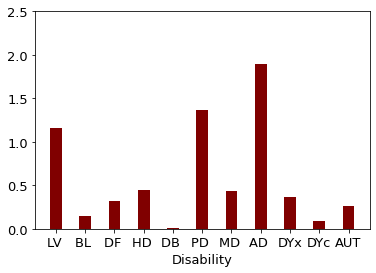

2018 IN_BAIXA_VISAO 3632
2018 IN_CEGUEIRA 559
2018 IN_SURDEZ 993
2018 IN_DEFICIENCIA_AUDITIVA 1777
2018 IN_SURDO_CEGUEIRA 9
2018 IN_DEFICIENCIA_FISICA 5912
2018 IN_DEFICIENCIA_MENTAL 1357
2018 IN_DEFICIT_ATENCAO 6018
2018 IN_DISLEXIA 1199
2018 IN_DISCALCULIA 247
2018 IN_AUTISMO 612


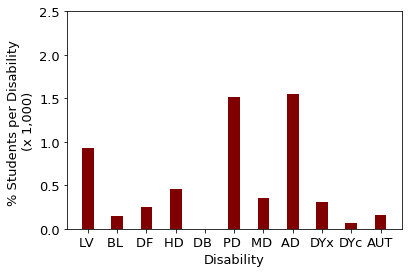

2017 IN_BAIXA_VISAO 4563
2017 IN_CEGUEIRA 611
2017 IN_SURDEZ 1268
2017 IN_DEFICIENCIA_AUDITIVA 2892
2017 IN_SURDO_CEGUEIRA 12
2017 IN_DEFICIENCIA_FISICA 7506
2017 IN_DEFICIENCIA_MENTAL 1549
2017 IN_DEFICIT_ATENCAO 6340
2017 IN_DISLEXIA 1191
2017 IN_DISCALCULIA 228
2017 IN_AUTISMO 528


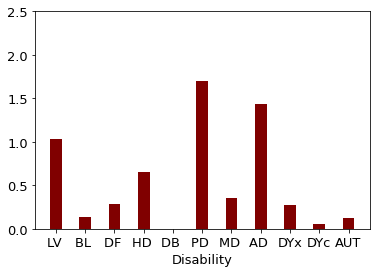

2016 IN_BAIXA_VISAO 7544
2016 IN_CEGUEIRA 800
2016 IN_SURDEZ 1461
2016 IN_DEFICIENCIA_AUDITIVA 4762
2016 IN_SURDO_CEGUEIRA 16
2016 IN_DEFICIENCIA_FISICA 13596
2016 IN_DEFICIENCIA_MENTAL 801
2016 IN_DEFICIT_ATENCAO 4547
2016 IN_DISLEXIA 1233
2016 IN_DISCALCULIA 279
2016 IN_AUTISMO 306


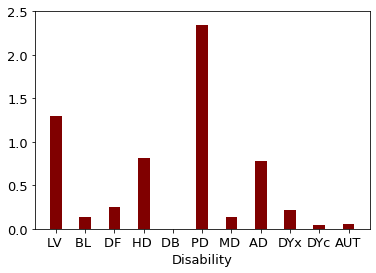

2015 IN_BAIXA_VISAO 7189
2015 IN_CEGUEIRA 787
2015 IN_SURDEZ 1304
2015 IN_DEFICIENCIA_AUDITIVA 4559
2015 IN_SURDO_CEGUEIRA 15
2015 IN_DEFICIENCIA_FISICA 12613
2015 IN_DEFICIENCIA_MENTAL 1599
2015 IN_DEFICIT_ATENCAO 3576
2015 IN_DISLEXIA 997
2015 IN_DISCALCULIA 166
2015 IN_AUTISMO 234


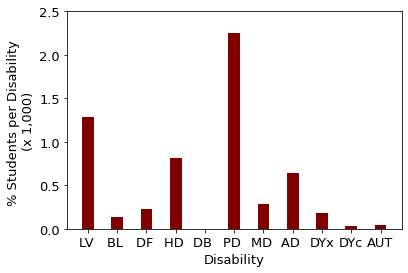

In [ ]:
ano = 2019
plt.rcParams.update({'font.size':13})
for i in range(len(paths)):
    plt.ylim(0, 2.5)
    clrData = pd.read_csv(paths[i], sep = ',', encoding = 'ISO-8859-1')
    total = len(clrData)
    totalPlot= []
    for condicao in Condicoes:
        numCond = len(clrData[clrData[condicao] == 1])
        print(ano, condicao, numCond)
        totalPlot.append(numCond*1000/total)
    plt.bar(Mnemonico, totalPlot, color ='maroon', width = 0.4)
    if i == 1 or i == 4 :
        plt.ylabel("% Students per Disability \n(x 1,000)")
    else:
        plt.ylabel("")
    plt.xlabel("Disability")
    ano -= 1
    plt.show()

In [ ]:
ano = 2019
for i in range(len(paths)):
    clrData = pd.read_csv(paths[i], sep = ',', encoding = 'ISO-8859-1')
    i = 0
    for condicao in Condicoes:
        groupPerf = []
        grupo = clrData[clrData[condicao] == 1]
        for perf in Desempenho:
            groupPerf.append(len(grupo[grupo['Desempenho'] == perf])/len(clrData[clrData['Desempenho'] == perf]))
        x_pos = np.arange(len(Desempenho))
        plt.title(Mnemonico[Condicoes.index(condicao)] + ' ' + str(ano))
        plt.bar(x_pos, groupPerf)
        plt.xticks(x_pos, Perf_labels)
        plt.ylim(0, 0.005)
        if i %2 == 0:
            plt.ylabel("Percentage of individuals with disabilities")
        else:
            plt.ylabel("")
        plt.xlabel("Performance group analyzed")
        plt.show()
        i += 1
    ano -= 1

In [ ]:
ano = 2019
for i in range(len(paths)):
    clrData = pd.read_csv(paths[i], sep = ',', encoding = 'ISO-8859-1')
    print(str(ano))
    geral = clrData[NOTAS].mean()
    row = 0
    dataTable = []
    for condicao in Condicoes:
        grupo = clrData[clrData[condicao] == 1]
        meanGr = grupo[NOTAS].mean()
        rowPerf = []
        for i in range(len(meanGr)):

            if(meanGr[i] > geral[i]):
                rowPerf.append('\u2191')
            else:
                rowPerf.append('\u2193')
        dataTable.append(rowPerf)
    tableOfPerf = pd.DataFrame(dataTable, columns= NOTAS, index = Condicoes )
    print(tableOfPerf)
    print("\n\n")
    tableOfPerf.to_csv(str(ano))
    ano -= 1

2019
                        NU_NOTA_CH NU_NOTA_LC NU_NOTA_CN NU_NOTA_MT  \
IN_BAIXA_VISAO                   ↓          ↓          ↓          ↓   
IN_CEGUEIRA                      ↓          ↓          ↓          ↓   
IN_SURDEZ                        ↓          ↓          ↓          ↓   
IN_DEFICIENCIA_AUDITIVA          ↓          ↓          ↓          ↓   
IN_SURDO_CEGUEIRA                ↓          ↓          ↓          ↓   
IN_DEFICIENCIA_FISICA            ↓          ↓          ↓          ↓   
IN_DEFICIENCIA_MENTAL            ↓          ↓          ↓          ↓   
IN_DEFICIT_ATENCAO               ↑          ↑          ↑          ↑   
IN_DISLEXIA                      ↑          ↓          ↑          ↑   
IN_DISCALCULIA                   ↑          ↓          ↑          ↓   
IN_AUTISMO                       ↓          ↓          ↓          ↓   

                        NU_NOTA_REDACAO  
IN_BAIXA_VISAO                        ↓  
IN_CEGUEIRA                           ↓  
IN_SURDEZ       

In [ ]:
print(meanGr)

NU_NOTA_CH         527.164103
NU_NOTA_LC         475.058120
NU_NOTA_CN         463.285043
NU_NOTA_MT         461.052564
NU_NOTA_REDACAO    434.952991
dtype: float64


In [ ]:
#Refazer o kmeans com repeticao de 10 vezes - FEITO
#Criar uma coluna de normalizaçao - FEITO
#Reanalisar as porcentagens de cada grupo considerando o tamanho do grupo de performance -> Autismo[Baixo] com Geral[Baixo] - FEITO
#Refazer a tabela em escalas de cores considerando uma apresentação mais palpavel - ENCAMINHADO
#Fazer uma tabela global - Normalização geral ou particular

In [ ]:
NOTAS_NORM = ['NU_NOTA_CH_NORM', 'NU_NOTA_LC_NORM', 'NU_NOTA_CN_NORM', 'NU_NOTA_MT_NORM', 'NU_NOTA_REDACAO_NORM']

In [ ]:

ano = 2019
for i in range(len(paths)):
    clrData = pd.read_csv(paths[i], sep = ',', encoding = 'ISO-8859-1')
    for j in range(len(NOTAS)):
        X = np.array(clrData[NOTAS[j]])
        X = preprocessing.minmax_scale(X, feature_range=(0, 1), axis=0, copy=True)
        clrData[NOTAS_NORM[j]] = X
    print(clrData)
    break
    clrData.to_csv(str(ano))
    ano -= 1

AxisError: axis 1 is out of bounds for array of dimension 1

In [ ]:
grupo = clrData.groupby('Desempenho')

In [ ]:
ano = 2019
for i in range(len(paths)):
    clrData = pd.read_csv(paths[i], sep = ',', encoding = 'ISO-8859-1')
    geral = clrData[NOTAS].mean()
    dataTable = []


    for condicao in Condicoes:
        grupo = clrData[clrData[condicao] == 1]
        meanGr = grupo[NOTAS].mean()
        rowPerf = []
        for i in range(len(meanGr)):
                rowPerf.append((meanGr[i] - geral[i])/geral[i])
        dataTable.append(rowPerf)
    tableOfPerf = pd.DataFrame(dataTable, columns= NOTAS, index = Condicoes )
    print(tableOfPerf)
    print("\n\n")
    tableOfPerf.to_csv("MEAN TABLE" + str(ano))
    ano -= 1

                         NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_CN  NU_NOTA_MT  \
IN_BAIXA_VISAO            -0.033720   -0.044391   -0.038310   -0.070371   
IN_CEGUEIRA               -0.043621   -0.059340   -0.061151   -0.109130   
IN_SURDEZ                 -0.151910   -0.188951   -0.129703   -0.161129   
IN_DEFICIENCIA_AUDITIVA   -0.083359   -0.111035   -0.068187   -0.087337   
IN_SURDO_CEGUEIRA         -0.097115   -0.129078   -0.113608   -0.136909   
IN_DEFICIENCIA_FISICA     -0.025828   -0.039379   -0.033871   -0.072334   
IN_DEFICIENCIA_MENTAL     -0.137692   -0.162178   -0.125774   -0.147486   
IN_DEFICIT_ATENCAO         0.101941    0.055587    0.130756    0.170109   
IN_DISLEXIA                0.010298   -0.014313    0.036627    0.031668   
IN_DISCALCULIA             0.014072   -0.011499    0.020985   -0.018415   
IN_AUTISMO                -0.013284   -0.043886   -0.009819   -0.030904   

                         NU_NOTA_REDACAO  
IN_BAIXA_VISAO                 -0.105150  
IN_CEGUEIRA  

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

<AxesSubplot:>

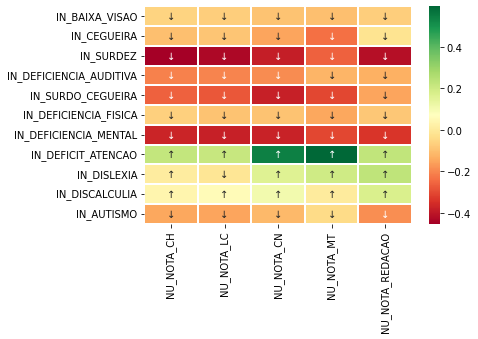

In [ ]:
def correspondence(X):
    if X > 0:
        return '\u2191'
    if X == 0:
        return '-'
    else:
        return '\u2193'



import seaborn as sns
arrowContent = tableOfPerf.applymap(correspondence)
sns.heatmap(tableOfPerf,cmap='RdYlGn', annot = arrowContent,  linewidths=0.2, fmt = '')

In [ ]:
#Tabela geral dando append nas notas normalizadas - FEITO
#O valor da tabela vai ser (grupo - geral)/geral - FEITO
#Montar figuras artigo - FEITO, teste de impressão FEITO
#Gerar grafico pra cada ano comparando com os sem tipo de deficiência - FEITO
#Gerar grafico geral com shadow - BAIXAR O PHOTOSHOP
#https://jamboard.google.com/d/1T5L7JkVJjEAlZTKG3t2PtyRIAPgo8WjXOkmizIrARPU/viewer?f=0
#Normalizar a barra do lado (020 015) - FEITO
#A barra vai ser a maior média de TODOS OS ANOS - FEITO
#Grafico com as quantidades de individuos com deficiencia
#https://jamboard.google.com/d/18i31YnDLxanNopAGHTzB68r-dtTPDAgtv7ByogGTJK0/viewer?f=0


<h1>Heatmap de todos os anos com o valor ajustado de 0.6 min/max

In [ ]:
def correspondence(X):
    if X > 0:
        return '\u2191'
    else:
        if X == 0:
            return '-'
        else:
            return '\u2193'

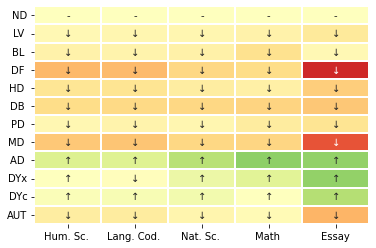

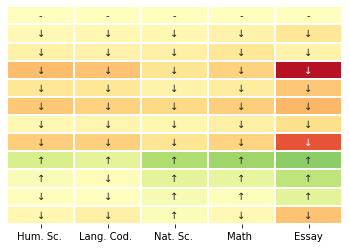

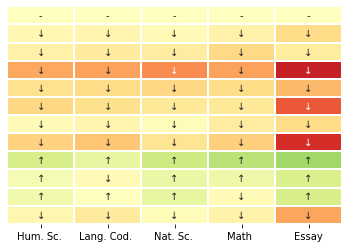

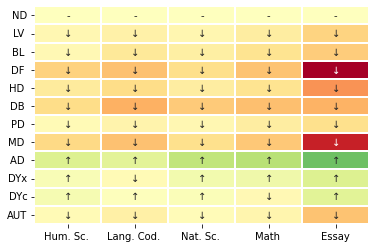

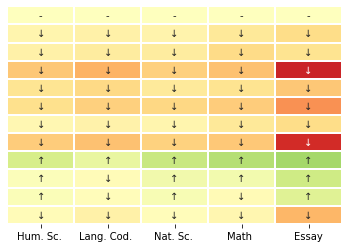

<Figure size 432x288 with 0 Axes>

In [ ]:


ano = 2015
paths_table = ['/home/joao/Desktop/Faculdade/IC/meanTable/MEAN TABLE2015',
              '/home/joao/Desktop/Faculdade/IC/meanTable/MEAN TABLE2016',
              '/home/joao/Desktop/Faculdade/IC/meanTable/MEAN TABLE2017',
              '/home/joao/Desktop/Faculdade/IC/meanTable/MEAN TABLE2018',
              '/home/joao/Desktop/Faculdade/IC/meanTable/MEAN TABLE2019']

for i in range(len(paths_table)):
    k = 0
    table = pd.read_csv(paths_table[i], sep = ',', encoding = 'ISO-8859-1', index_col='Unnamed: 0')*100
    arrowContent = table.applymap(correspondence)
    if i >= 3:
        if i == 3:
            sns.heatmap(table,cmap='RdYlGn', cbar = False, annot = arrowContent, vmin = -50, vmax = 50, linewidths=0.2, fmt = '', yticklabels = Lista, xticklabels = MnemonicoProva)
        else:
            sns.heatmap(table,cmap='RdYlGn', cbar = False, annot = arrowContent, vmin = -50, vmax = 50, linewidths=0.2, fmt = '', yticklabels = False, xticklabels = MnemonicoProva)

        #sns.heatmap(table,cmap='RdYlGn',cbar_kws={"orientation": "horizontal"}, annot = arrowContent, vmin = -50, vmax = 50,linewidths=0.2, fmt = '', yticklabels = Lista, xticklabels = MnemonicoProva).set_title(str(ano))
    else:
            if i == 0:
                sns.heatmap(table,cmap='RdYlGn', cbar = False, annot = arrowContent, vmin = -50 ,vmax = 50, linewidths=0.2, fmt = '', yticklabels = Lista, xticklabels = MnemonicoProva)
            else:
                 sns.heatmap(table,cmap='RdYlGn', cbar = False, annot = arrowContent, vmin = -50, vmax = 50, linewidths=0.2, fmt = '', yticklabels = False, xticklabels = MnemonicoProva)
    plt.yticks(rotation=0)
    plt.xticks(rotation=0)
    plt.figure()
    ano += 1

In [ ]:
allYears = pd.DataFrame()
for i in range(len(paths)):
    print(i)
    clrData = pd.read_csv(paths[i], sep = ',', encoding = 'ISO-8859-1')
    allYears = pd.concat([allYears, clrData[NOTAS + Condicoes]], ignore_index=True)

0
1
2
3
4


IN_BAIXA_VISAO
IN_CEGUEIRA
IN_SURDEZ
IN_DEFICIENCIA_AUDITIVA
IN_SURDO_CEGUEIRA
IN_DEFICIENCIA_FISICA
IN_DEFICIENCIA_MENTAL
IN_DEFICIT_ATENCAO
IN_DISLEXIA
IN_DISCALCULIA
IN_AUTISMO


<AxesSubplot:>

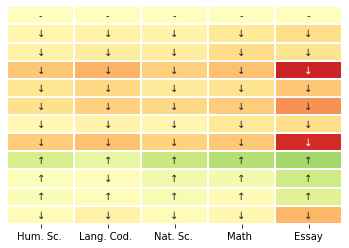

In [ ]:
dataTable = []
geral = allYears[NOTAS].mean()
NonDis = allYears[(allYears[Condicoes] == 0).all(1)]
NonDis = NonDis[NOTAS].mean()
diff = list(NonDis - geral)
dataTable.append(diff)

for condicao in Condicoes:
    print(condicao)
    grupo = allYears[allYears[condicao] == 1]
    meanGr = grupo[NOTAS].mean()
    rowPerf = []
    for i in range(len(meanGr)):
        rowPerf.append((meanGr[i] - geral[i])/geral[i])
    dataTable.append(rowPerf)
tableOfPerf = pd.DataFrame(dataTable, columns= NOTAS, index = Lista)*100
arrowContent = tableOfPerf.applymap(correspondence)
sns.heatmap(table,cmap='RdYlGn', cbar = False, annot = arrowContent, vmin = -50, vmax = 50, linewidths=0.2, fmt = '', yticklabels = False, xticklabels = MnemonicoProva)

<h1> Deficit de atenção tem uma média 60% maior sobre o padrão normalizado, mas 23% sobre a nota geral, aproximadamente

<h1> Análise da quantidade de indiviuos com deficiência e transtorno em cada grupo

<h2> Não é uma boa ideia fazer soma simples, ela depende da quantidade total do grupo e não é isso que a gente quer eu acho

In [ ]:
#Padronizar apresentação dos nomes das deficiencias e indicadores
#Adicionar média com sem deficiencia
#Fazer a tabela geral com o numero de grupos

In [ ]:
ano = 2019
equivalence_dict = {'ALTO': 3, 'MEDIO': 2, 'BAIXO': 1}
dataTable = []
for i in range(len(paths)):
    clrData = pd.read_csv(paths[i], sep = ',', encoding = 'ISO-8859-1')
    clrData['Dict'] = clrData['Desempenho'].map(equivalence_dict)
    geral = clrData[(clrData[Condicoes] == 0).all(1)]
    ColumnPerf = []
    ColumnPerf.append(geral['Dict'].mean())

    for condicao in Condicoes:
        grupo = clrData[clrData[condicao] == 1]
        meanGr = grupo['Dict'].mean()
        ColumnPerf.append(meanGr)
    dataTable.append(ColumnPerf)
print(dataTable)

[[1.9004964094733345, 1.656678281068525, 1.5804066543438078, 1.1506734006734007, 1.502409638554217, 1.2962962962962963, 1.6766574037316395, 1.2009864364981504, 2.381950384944397, 2.045925925925926, 1.95625, 1.747634069400631], [1.8024709420424754, 1.5779185022026432, 1.479427549194991, 1.0825780463242698, 1.4288126055149128, 1.1111111111111112, 1.6263531799729365, 1.1672807663964628, 2.373712196743104, 1.9291075896580483, 1.8663967611336032, 1.6388888888888888], [2.2970682590977947, 2.144203374972606, 2.0752864157119477, 1.5733438485804416, 1.968533886583679, 1.75, 2.140687450039968, 1.6888315041962556, 2.6056782334384856, 2.3811922753988246, 2.3728070175438596, 2.0416666666666665], [1.8085379058980255, 1.6534994697773064, 1.55625, 1.1697467488021902, 1.515119697606048, 1.125, 1.6131215063253899, 1.227215980024969, 2.410160545414559, 2.0364963503649633, 1.885304659498208, 1.6699346405228759], [1.814071721516455, 1.6569759354569482, 1.576874205844981, 1.1932515337423313, 1.5139284930905

In [ ]:
df_all_transposed = pd.DataFrame(dataTable, columns = Lista, index = [2019, 2018,2017,2016,2015]).transpose()

In [ ]:
def correspondence(X):
    if X > 2:
        return '\u2191'
    else:
        if X == 0:
            return '-'
        else:
            return '\u2193'

arrowCont = df_all_transposed.applymap(correspondence)

<AxesSubplot:>

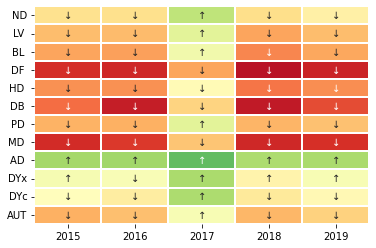

In [ ]:

sns.heatmap(df_all_transposed.iloc[:, ::-1], cbar = False, cmap='RdYlGn', linewidths=0.2, fmt = '', vmin = 1, vmax = 3, annot = arrowCont)


<h1> A media geral de 2017 realmente da 2.29 aproximadamente, mesmo com outros valores de kmeans...

In [ ]:
#Adicionar a tabela de "Sem deficiencia no inicio" - Parcial
#Colocar os valores percentuais do lado - Feito
#Compactar os nomes dos indicadores e provas - Feito
#Criar acronimos em inglês - Feito
#Inverter ordem dos anos no grafico de grupos - Feito
#Trocar geral por termo politicamente correto em ingles - Feito
#Retirar o valor da média geral no ultimo grafico - Feito
#Comentar sobre a diferença de 2017

In [ ]:
ano = 2019
equivalence_dict = {'ALTO': 3, 'MEDIO': 2, 'BAIXO': 1}
dataTable = []
for i in range(len(paths)):
    clrData = pd.read_csv(paths[i], sep = ',', encoding = 'ISO-8859-1')
    clrData['Dict'] = clrData['Desempenho'].map(equivalence_dict)
    geral = clrData[(clrData[Condicoes] == 0).all(1)]
    ColumnPerf = []
    ColumnPerf.append(0)

    for condicao in Condicoes:
        grupo = clrData[clrData[condicao] == 1]
        meanGr = grupo['Dict'].mean()
        ColumnPerf.append((meanGr- geral['Dict'].mean())/ geral['Dict'].mean())
    dataTable.append(ColumnPerf)
print(dataTable)

[[0, -0.12829181217573382, -0.16842428827225725, -0.3945406079497539, -0.20946462668110769, -0.31791699798289763, -0.11777923106086019, -0.3680669794946007, 0.253330641968686, 0.07652185804070687, 0.029336330365452225, -0.08043284865508628], [0, -0.12458033835784332, -0.17922252465353294, -0.39939223369806826, -0.20730338992547112, -0.3835622615629785, -0.09770907145386239, -0.3523996758173782, 0.3169212004346238, 0.07025724779345081, 0.03546565861344211, -0.09075433580539337], [0, -0.06654781960429357, -0.09654995775918075, -0.3150643902944381, -0.143023339081422, -0.2381593393801294, -0.06807843364621964, -0.2647882806671285, 0.1343495009860533, 0.036622340658727666, 0.032971923296616516, -0.11118589594348435], [0, -0.08572584274573726, -0.13949826822830821, -0.35320860846355606, -0.16224056312841365, -0.37795055534576494, -0.10805214473821166, -0.32143198324859135, 0.33265691449126644, 0.12604571003102394, 0.04244685906213506, -0.07663829711455593], [0, -0.08659844271657802, -0.1307

In [ ]:
df_all_transposed = pd.DataFrame(dataTable, columns = Lista, index = [2019, 2018,2017,2016,2015]).transpose()

In [ ]:
def correspondence(X):
    if X > 0:
        return '\u2191'
    else:
        if X == 0:
            return '-'
        else:
            return '\u2193'

arrowCont = df_all_transposed.applymap(correspondence)

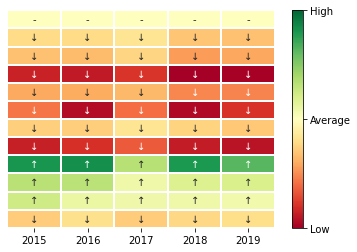

In [ ]:
ax = sns.heatmap(df_all_transposed.iloc[:, ::-1], cbar = False, yticklabels = False, cmap='RdYlGn', vmin = -0.4, vmax= 0.4, linewidths=0.2, fmt = '', annot = arrowCont)
cbar = ax.figure.colorbar(ax.collections[0])
cbar.set_ticks([-0.4, 0, 0.4])
cbar.set_ticklabels(["Low", "Average", "High"])
plt.show()

In [ ]:
# Adicionar porcentagem na barra da figura 2
# Colocar sombra completa na imagem geral
# Colocar nome das provas
# ____________________________________________
# Tirar o titulo, Normalized no caption e texto completo no caption
# Inserir setas
# Igualar o tamanho das caixinhas
_______________________________________________________
#Montar overleaf, descrever os dados em data analysis, apresentar imagens e na seção de resultados discutir

In [ ]:
#Analisar ambos heatmaps juntamente pra nao ter repetição
#Iniciar em cada subseção com metodologia e resultado
#Analisar os graficos dos anos de 2019

In [ ]:
#Colocar todos os anos do elbow, e colocar uma seta pro cotovelo
#Pensar em alto nivel o que descrever
#Quebrar a tarefa em várias - "Talvez faça isso, isso e isso"
#Detalhes de como colocou em prática focando em amarrar as partes
#https://arxiv.org/pdf/2109.02704.pdf

In [ ]:
#5.1 Data presentantion
#nota de varios anos, varios alunos e 5 notas
#5.1.1 Preprocessing
#5.1.2 Resulting dataset
#Elbow maior - Feito
#Criar duas versões Gerar nd no grafico azul em LOG - Inviavel

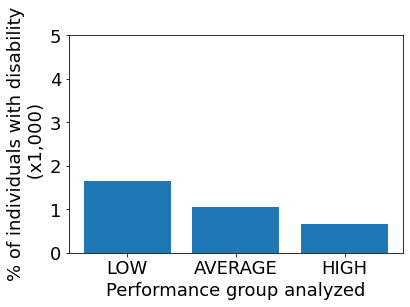

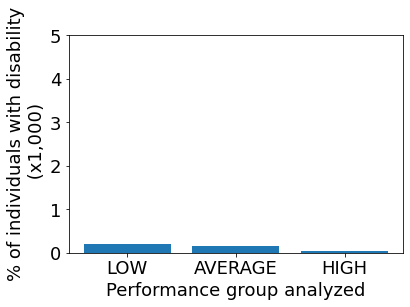

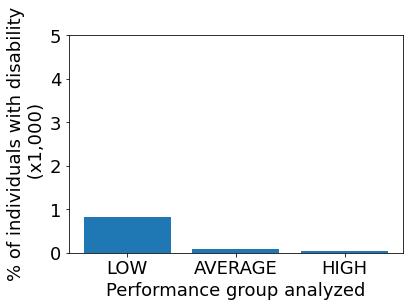

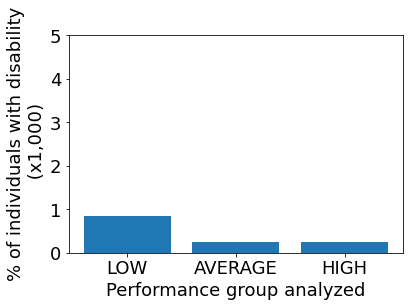

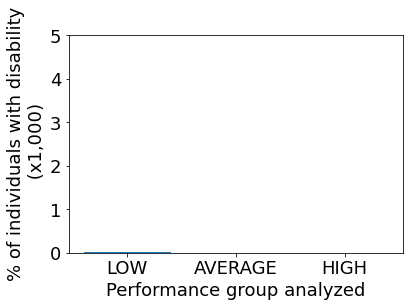

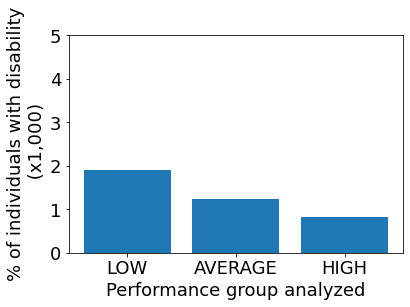

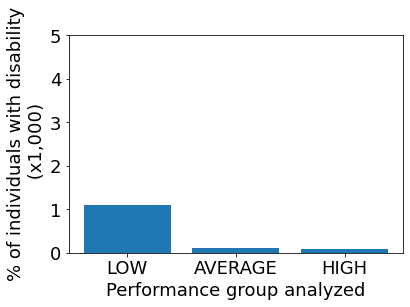

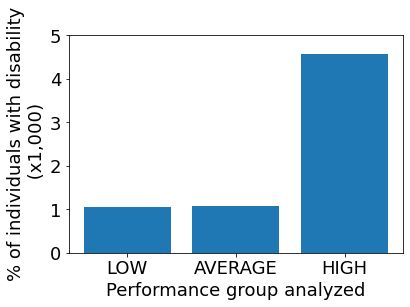

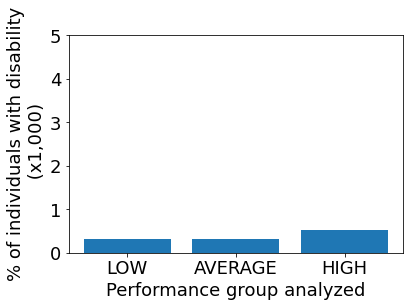

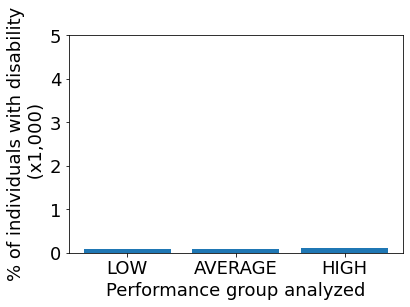

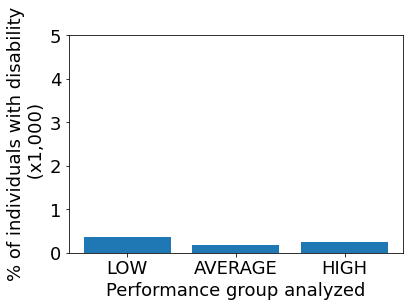

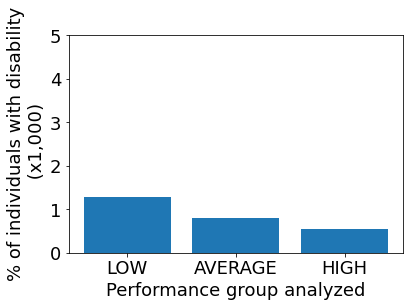

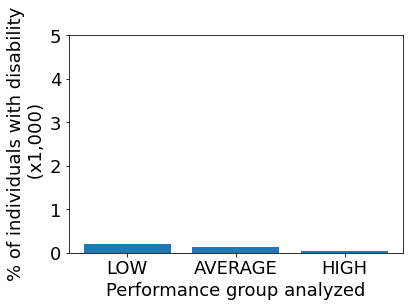

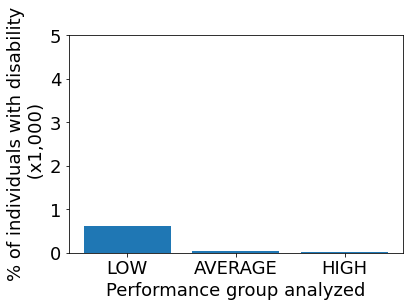

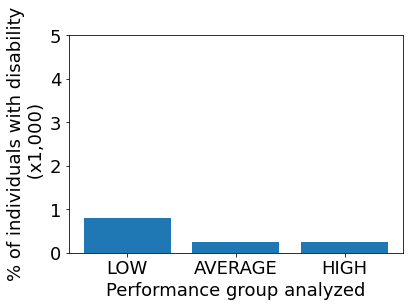

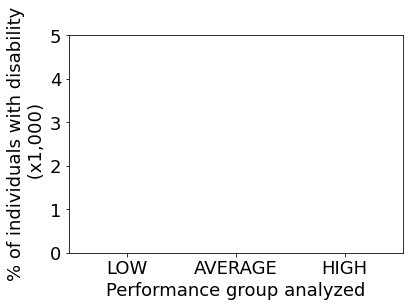

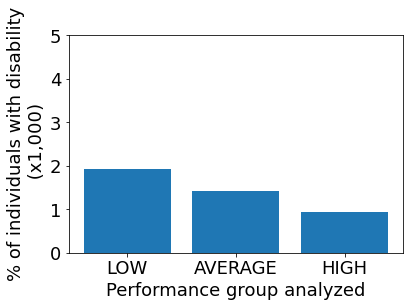

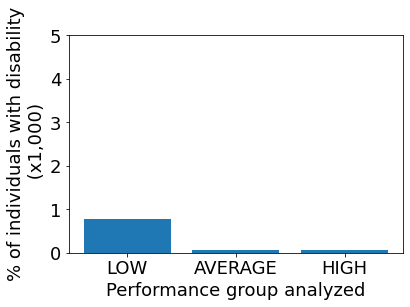

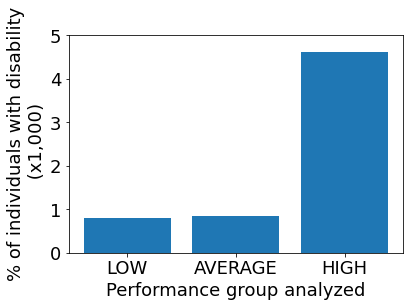

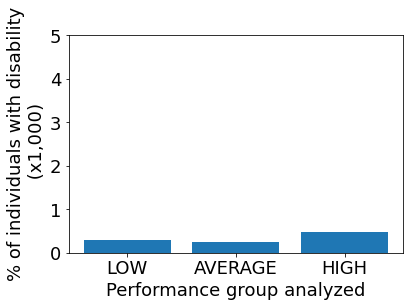

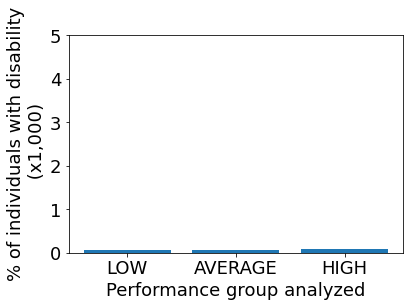

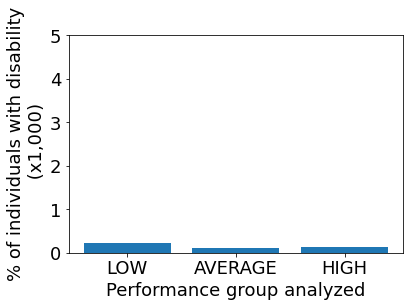

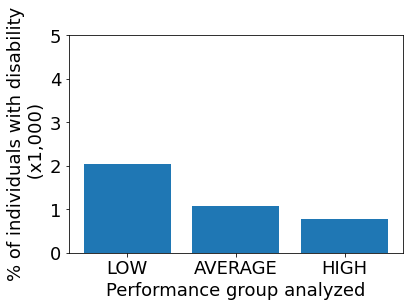

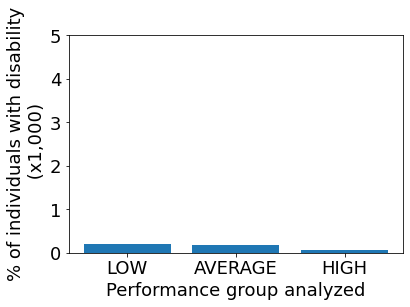

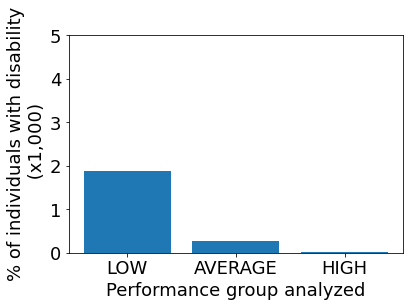

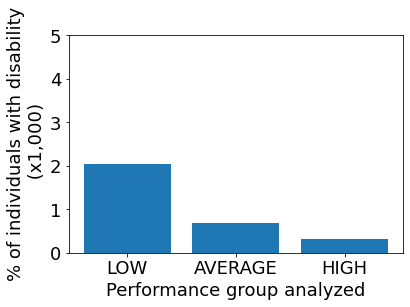

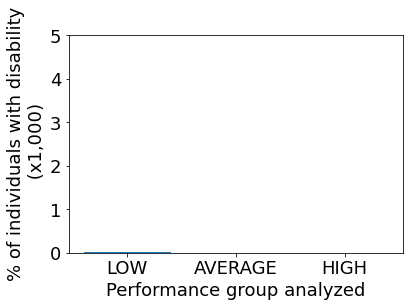

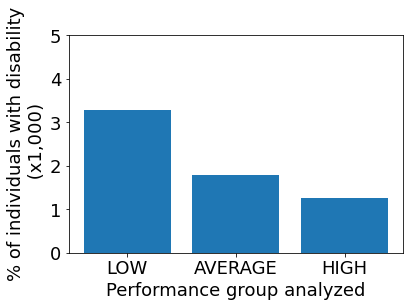

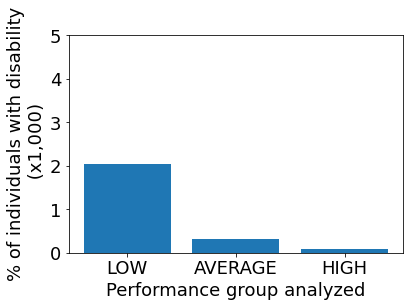

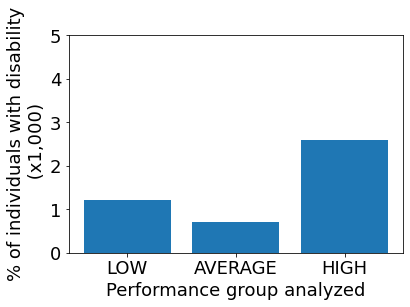

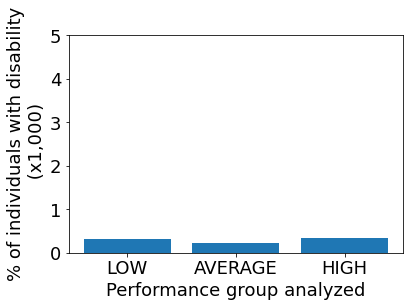

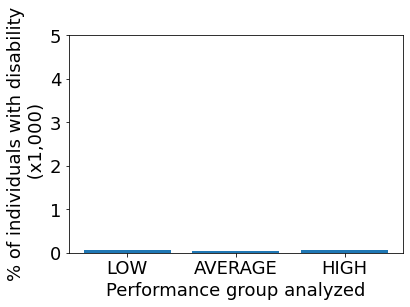

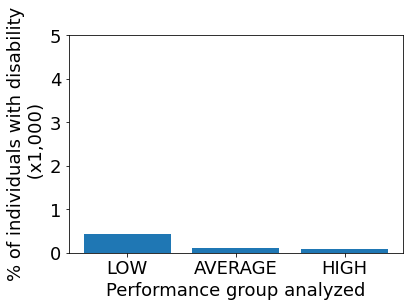

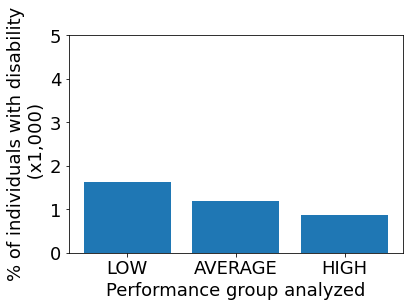

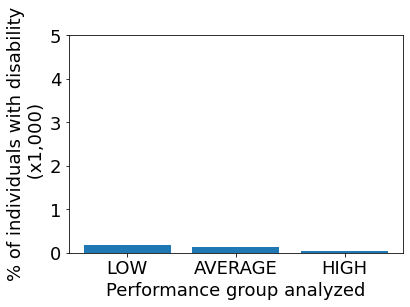

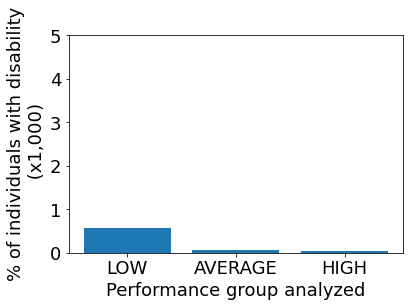

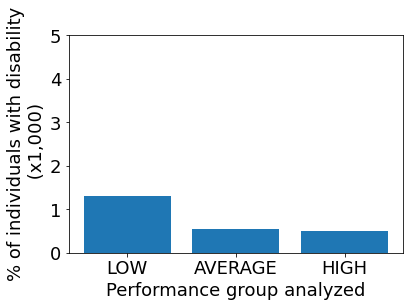

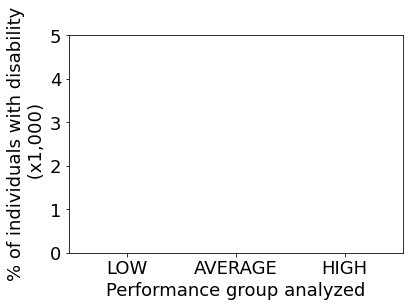

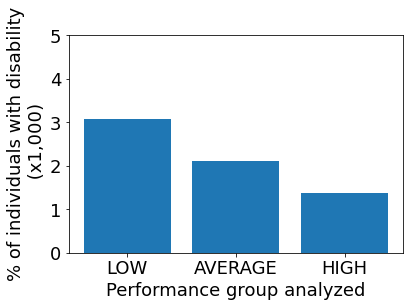

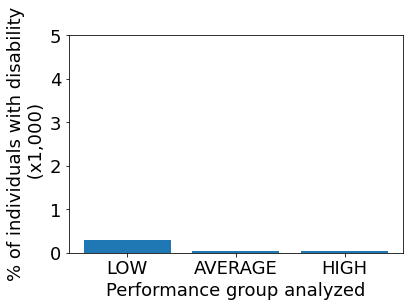

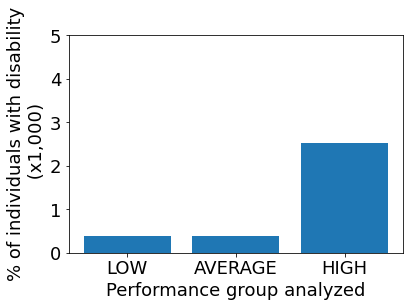

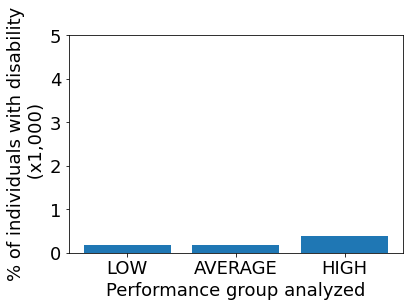

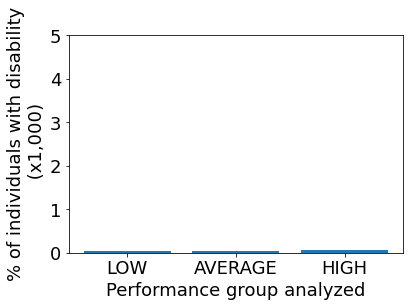

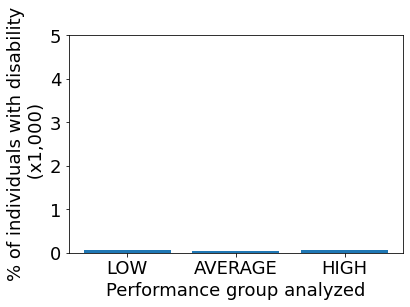

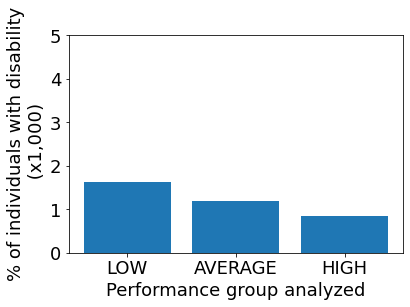

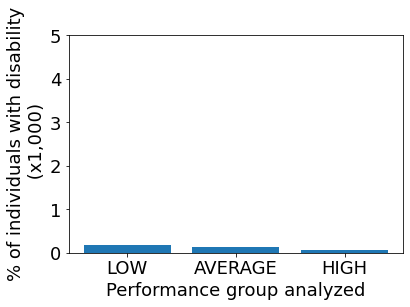

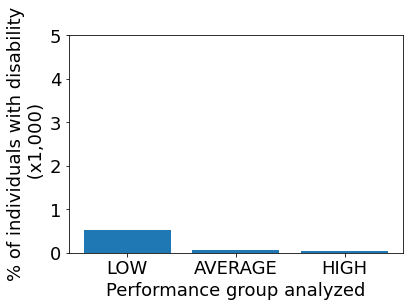

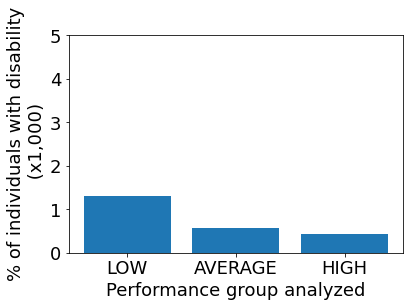

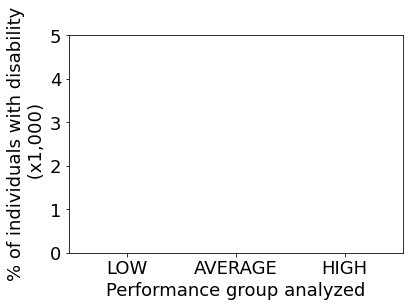

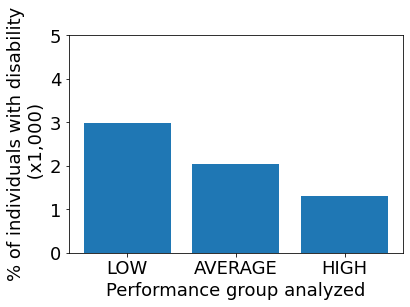

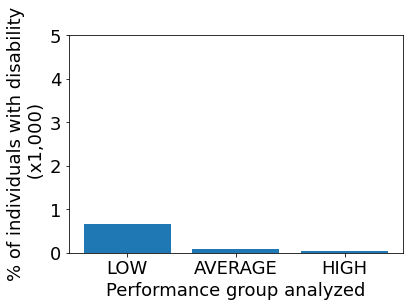

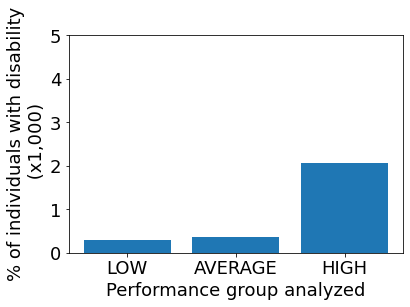

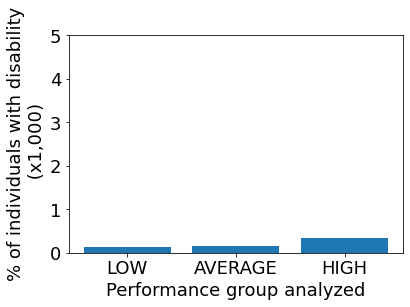

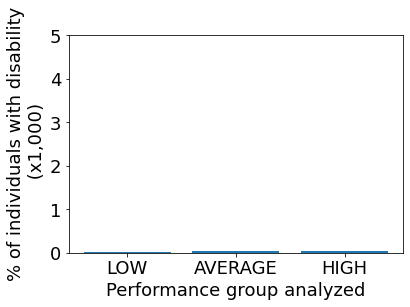

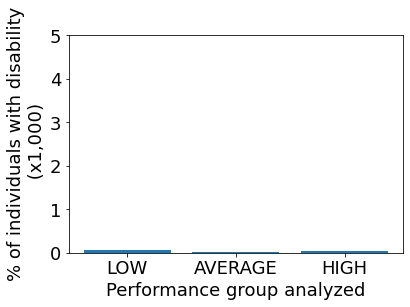

In [ ]:
#Redoing %
ano = 2019
plt.rcParams.update({'font.size':18})
for i in range(len(paths)):
    clrData = pd.read_csv(paths[i], sep = ',', encoding = 'ISO-8859-1')
    i = 0
    for condicao in Condicoes:
        groupPerf = []
        grupo = clrData[clrData[condicao] == 1]
        for perf in Desempenho:
            groupPerf.append(len(grupo[grupo['Desempenho'] == perf])/len(clrData[clrData['Desempenho'] == perf])*1000)
        x_pos = np.arange(len(Desempenho))
        plt.bar(x_pos, groupPerf)
        plt.xticks(x_pos, Perf_labels)
        plt.ylim(0, 5)
        plt.ylabel("% of individuals with disability\n (x1,000)")
        plt.xlabel("Performance group analyzed")

        plt.show()
        i += 1
    ano -= 1

In [ ]:
#Redoing %
ano = 2019
plt.rcParams.update({'font.size':18})

for i in range(len(paths)):
    clrData = pd.read_csv(paths[i], sep = ',', encoding = 'ISO-8859-1')
    i = 0
    for condicao in Condicoes:
        groupPerf = []
        grupo = clrData[clrData[condicao] == 1]
        for perf in Desempenho:
            groupPerf.append(len(grupo[grupo['Desempenho'] == perf])/len(clrData[clrData['Desempenho'] == perf]))
        x_pos = np.arange(len(Desempenho))
        plt.bar(x_pos, groupPerf)
        plt.title(condicao)
        plt.xticks(x_pos, Perf_labels)
        plt.ylabel("% of individuals with disabilities")
        plt.xlabel("Performance group analyzed")
        plt.yscale('log')
        plt.ylim(0, 1)
        plt.show()
        i += 1
    ano -= 1

/tmp/ipykernel_6173/2190907245.py:18: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0, 1)


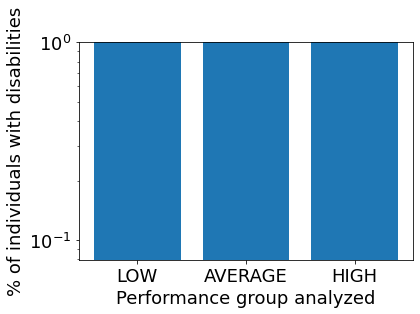

KeyboardInterrupt: 

In [ ]:
ano = 2019
plt.rcParams.update({'font.size':18})

for i in range(len(paths)):

    clrData = pd.read_csv(paths[i], sep = ',', encoding = 'ISO-8859-1')
    i = 0
    groupPerf = []
    grupo = clrData[(clrData[Condicoes] == 0).all(1)]
    for perf in Desempenho:
        groupPerf.append(len(grupo[grupo['Desempenho'] == perf])/len(clrData[clrData['Desempenho'] == perf]))
    x_pos = np.arange(len(Desempenho))
    plt.bar(x_pos, groupPerf)
    plt.xticks(x_pos, Perf_labels)
    plt.ylabel("% of individuals with disabilities")
    plt.xlabel("Performance group analyzed")
    plt.yscale('log')
    plt.ylim(0, 1)
    plt.show()
    i += 1
    ano -= 1

In [ ]:
#Squared distance /100,000
#Disability in singular
#use , as separator
#Tirar o eixo Y da figura 5
#Escrever a seção 5 (Data presets)


In [ ]:
#Juntar Table I e Table II - Feito
#SubTables/Subfigure - Feito
#Especificar sobre alunos que tiraram zero nas provas - Feito
#Colocar implementação do kmeans - Feito/Discutir K++
#Nome pras questões - Feito

In [ ]:
#Trocar o termo outliers
#DF, MD, DYx, AD
#Heatmap map com presença localidade, escola
#Q6/Q5
#Fitting da gaussiana pra baixa media e alta e plotar

In [ ]:
pathsProcessed = ['/home/joao/Desktop/Faculdade/IC/ProcessedData/2019',
        '/home/joao/Desktop/Faculdade/IC/ProcessedData/2018',
        '/home/joao/Desktop/Faculdade/IC/ProcessedData/2017',
        '/home/joao/Desktop/Faculdade/IC/ProcessedData/2016',
        '/home/joao/Desktop/Faculdade/IC/ProcessedData/2015'
]

brutePath = ['/home/joao/Desktop/Faculdade/IC/DataSets/microdados_enem_2019/DADOS/MICRODADOS_ENEM_2019.csv',
        '/home/joao/Desktop/Faculdade/IC/DataSets/microdados_enem2018/DADOS/MICRODADOS_ENEM_2018.csv',
        '/home/joao/Desktop/Faculdade/IC/DataSets/microdados_enem2017/Microdados Enem 2017/DADOS/MICRODADOS_ENEM_2017.csv',
        '/home/joao/Desktop/Faculdade/IC/DataSets/microdados_enem2016/Microdados_enem_2016/DADOS/microdados_enem_2016.csv',
        '/home/joao/Desktop/Faculdade/IC/DataSets/microdados_enem2015/DADOS/MICRODADOS_ENEM_2015.csv'
]
ano = 2019
for i in range(len(brutePath)):
    print(ano)
    clrData = pd.read_csv(pathsProcessed[i], sep = ',', encoding = 'ISO-8859-1')
    brtData = pd.read_csv(brutePath[i], sep = ';', usecols = ['NU_INSCRICAO', 'Q005', 'Q006'], encoding = 'ISO-8859-1')
    clrData = clrData.join(brtData.set_index('NU_INSCRICAO'), on = 'NU_INSCRICAO')
    clrData.to_csv(str(ano), index = False)

    ano -= 1

In [ ]:
#Criei outro apenas pra 2015 pq o separador dele é , e não ; e eu tinha esquecido disso
clrData = pd.read_csv('/home/joao/Desktop/Faculdade/IC/ProcessedData/2015', sep = ',', encoding = 'ISO-8859-1')
brtData = pd.read_csv('/home/joao/Desktop/Faculdade/IC/DataSets/microdados_enem2015/DADOS/MICRODADOS_ENEM_2015.csv', sep = ',', usecols = ['NU_INSCRICAO', 'Q005', 'Q006'], encoding = 'ISO-8859-1')
clrData = clrData.join(brtData.set_index('NU_INSCRICAO'), on = 'NU_INSCRICAO')
clrData.to_csv('2015', index = False)

In [ ]:
clrData = pd.read_csv(paths[0], sep = ',', encoding = 'ISO-8859-1')

In [ ]:
salarioCorresp = {'A': 0, 'B': 394, 'C':952, 'D': 1377, 'E': 1771, 'F': 2177, 'G': 2758, 'H': 3532, 'I': 4334, 'J':5122, 'K': 5910, 'L': 6698, 'M': 7486, 'N': 8668, 'O': 10638, 'P': 13790, 'Q': 19960}
clrData['Salario'] = clrData['Q006'].map(salarioCorresp)
clrData['MediaSalarial'] = clrData['Salario']/clrData['Q005']

In [ ]:
dataGauss = clrData.groupby('MediaSalarial')

KeyError: 'MediaSalarial'

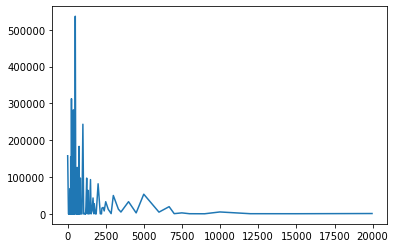

In [ ]:
plt.plot(dataGauss.groups.keys(), dataGauss['MediaSalarial'].count())

In [ ]:
#Fazer o heatmap do mapa para o geral #ok
#Heatmap de todos os anos
#testar qualidade
#fittar uma gaussiana com inflaçao
#grafico de barra maior

In [ ]:
dataTest = clrData

In [ ]:
dataTest = dataTest.groupby('SG_UF_RESIDENCIA').count()

In [ ]:
dataTest['SG_UF_RESIDENCIA'] = dataTest.index

In [ ]:
dataTest

,Unnamed: 0,NU_INSCRICAO,TP_ESCOLA,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,...,K-classe,Desempenho,NU_NOTA_CH_NORM,NU_NOTA_LC_NORM,NU_NOTA_CN_NORM,NU_NOTA_MT_NORM,NU_NOTA_REDACAO_NORM,Q005,Q006,SG_UF_RESIDENCIA
SG_UF_RESIDENCIA,,,,,,,,,,,,,,,,,,,,,
AC,21,21,21,21,21,21,21,21,21,21,...,21,21,21,21,21,21,21,21,21,AC
AL,89,89,89,89,89,89,89,89,89,89,...,89,89,89,89,89,89,89,89,89,AL
AM,25,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,AM
AP,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,AP
BA,302,302,302,302,302,302,302,302,302,302,...,302,302,302,302,302,302,302,302,302,BA
CE,340,340,340,340,340,340,340,340,340,340,...,340,340,340,340,340,340,340,340,340,CE
DF,293,293,293,293,293,293,293,293,293,293,...,293,293,293,293,293,293,293,293,293,DF
ES,211,211,211,211,211,211,211,211,211,211,...,211,211,211,211,211,211,211,211,211,ES
GO,476,476,476,476,476,476,476,476,476,476,...,476,476,476,476,476,476,476,476,476,GO


In [ ]:
salarioCorresp = [
{'A': 0, 'B': 499, 'C':1247, 'D': 1746, 'E': 2245, 'F': 2744, 'G': 3493, 'H': 4491, 'I': 5489, 'J':6487, 'K': 7485, 'L': 8483, 'M': 9481, 'N': 10978, 'O': 13473, 'P': 17465, 'Q': 19960},
{'A': 0, 'B': 477, 'C':1192, 'D': 1669, 'E': 2146, 'F': 2623, 'G': 3249, 'H': 4293, 'I': 5247, 'J':6201, 'K': 7155, 'L': 8109, 'M': 9063, 'N': 10494, 'O': 12879, 'P': 16695, 'Q': 19080},
{'A': 0, 'B': 468, 'C':1171, 'D': 1639, 'E': 2108, 'F': 2576, 'G': 3279, 'H': 4216, 'I': 5153, 'J':6090, 'K': 7047, 'L': 7964, 'M': 8901, 'N': 10307, 'O': 12649, 'P': 16397, 'Q': 18740},
{'A': 0, 'B': 440, 'C':1100, 'D': 1540, 'E': 1980, 'F': 2420, 'G': 3080, 'H': 3960, 'I': 4840, 'J':5720, 'K': 6600, 'L': 7480, 'M': 8360, 'N': 9680,  'O': 11800, 'P': 15400, 'Q': 17600},
{'A': 0, 'B': 394, 'C':952,  'D': 1377, 'E': 1771,  'F': 2177, 'G': 2758, 'H': 3532, 'I': 4334, 'J':5122, 'K': 5910, 'L': 6698, 'M': 7486, 'N': 8668,  'O': 10638, 'P': 13790, 'Q': 15760}
]
inflacaoMedia = [3.74, 3.66, 3.46, 8.77, 9.01]

for i in range(len(salarioCorresp)):
    for key in salarioCorresp[i]:
        salarioCorresp[i][key] /= ((100 + inflacaoMedia[i])/100)

In [ ]:
ano = 2019
for i in range(len(paths)):
    clrData = pd.read_csv(paths[i], sep = ',', encoding = 'ISO-8859-1')
    clrData['Salario'] = clrData['Q006'].map(salarioCorresp[i])
    clrData['MediaSalarial'] = clrData['Salario']/clrData['Q005']
    clrData.to_csv(str(ano))
    ano -= 1

In [ ]:
li = []
for i in range(len(paths)):
    li.append(pd.read_csv(paths[i], sep = ',', encoding = 'ISO-8859-1'))
FinalData = pd.concat(li, axis=0, ignore_index=True)
FinalData.to_csv('AllYears.csv')

In [ ]:
FinalData

,Unnamed: 0.1,Unnamed: 0,NU_INSCRICAO,SG_UF_RESIDENCIA,TP_ESCOLA,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,...,Desempenho,NU_NOTA_CH_NORM,NU_NOTA_LC_NORM,NU_NOTA_CN_NORM,NU_NOTA_MT_NORM,NU_NOTA_REDACAO_NORM,Q005,Q006,Salario,MediaSalarial
0,0,0,190001199383,TO,1,0,0,0,0,0,...,MEDIO,0.361518,0.448822,0.292495,0.052674,0.46,4.0,E,2164.064006,541.016002
1,1,1,190001237802,MG,1,0,0,0,0,0,...,ALTO,0.500000,0.518449,0.348405,0.507582,0.86,3.0,G,3367.071525,1122.357175
2,2,2,190001782198,MT,1,0,0,0,0,0,...,ALTO,0.633667,0.504899,0.442402,0.504868,0.80,7.0,E,2164.064006,309.152001
3,3,3,190001421548,BA,1,0,0,0,0,0,...,MEDIO,0.332242,0.386075,0.293996,0.376217,0.60,3.0,B,481.010218,160.336739
4,4,4,190001592266,SP,2,0,0,0,0,0,...,MEDIO,0.447227,0.376277,0.405253,0.194254,0.40,5.0,F,2645.074224,529.014845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23420042,5598315,5598315,150007615879,RJ,2,0,0,0,0,0,...,MEDIO,0.439898,0.361621,0.181515,0.134695,0.52,4.0,G,2530.043115,632.510779
23420043,5598316,5598316,150007393792,PR,1,0,0,0,0,0,...,ALTO,0.578113,0.658257,0.488979,0.538366,0.56,5.0,Q,14457.389230,2891.477846
23420044,5598317,5598317,150007525737,MG,3,0,0,0,0,0,...,MEDIO,0.561081,0.482607,0.219670,0.363235,0.60,5.0,D,1263.186864,252.637373
23420045,5598318,5598318,150007415907,RN,1,0,0,0,0,0,...,MEDIO,0.473767,0.470948,0.326542,0.279603,0.78,6.0,E,1624.621594,270.770266


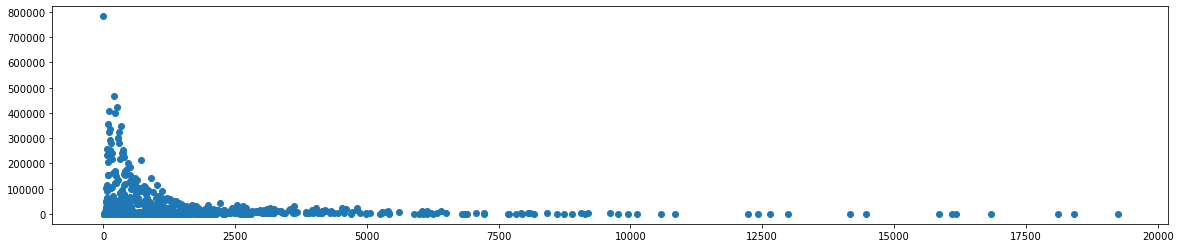

In [ ]:
dataGauss = FinalData.groupby('MediaSalarial')
plt.figure(figsize=(20,4))
plt.scatter(dataGauss.groups.keys(), dataGauss['MediaSalarial'].count())

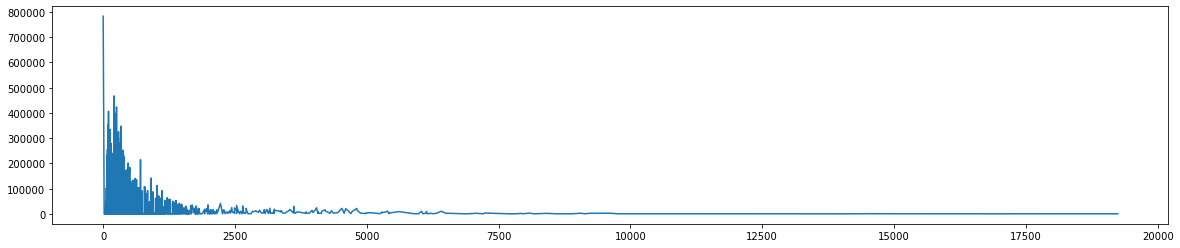

In [ ]:
plt.figure(figsize=(20,4))
plt.plot(dataGauss['MediaSalarial'].count())


In [ ]:
import folium

ind_especificos = ['IN_SURDEZ', 'IN_DEFICIENCIA_MENTAL', 'IN_DISLEXIA', 'IN_DEFICIT_ATENCAO']
for indicador in ind_especificos:

    dataTest = FinalData[FinalData[indicador] == 1]
    dataTest = dataTest.groupby('SG_UF_RESIDENCIA').count()
    dataTest['SG_UF_RESIDENCIA'] = dataTest.index


    m = folium.Map(
        location = [-14, -51],
            zoom_start = 6
        )

    folium.Choropleth(
        geo_data = 'Brasil.json',
        data = dataTest,
        columns = ['SG_UF_RESIDENCIA', 'NU_INSCRICAO'],
        key_on = 'feature.properties.UF',
        fill_color = 'OrRd'

    ).add_to(m)

    m.save(indicador)

In [ ]:
ind_especificos = ['IN_SURDEZ', 'IN_DEFICIENCIA_MENTAL', 'IN_DISLEXIA', 'IN_DEFICIT_ATENCAO']
for indicador in ind_especificos:

    dataTest = FinalData[FinalData[indicador] == 1].where(FinalData['TP_ESCOLA'] == 3)
    dataTest = dataTest.groupby('SG_UF_RESIDENCIA').count()
    dataTest['SG_UF_RESIDENCIA'] = dataTest.index


    m = folium.Map(
        location = [-14, -51],
            zoom_start = 6
        )

    folium.Choropleth(
        geo_data = 'Brasil.json',
        data = dataTest,
        columns = ['SG_UF_RESIDENCIA', 'NU_INSCRICAO'],
        key_on = 'feature.properties.UF',
        fill_color = 'OrRd'

    ).add_to(m)

    m.save(indicador)

In [ ]:
dataTest = FinalData[FinalData['TP_ESCOLA'] == 3]
dataTest = dataTest.groupby('SG_UF_RESIDENCIA').count()
dataTest['SG_UF_RESIDENCIA'] = dataTest.index


m = folium.Map(
    location = [-14, -51],
        zoom_start = 6
    )

folium.Choropleth(
    geo_data = 'Brasil.json',
    data = dataTest,
    columns = ['SG_UF_RESIDENCIA', 'NU_INSCRICAO'],
    key_on = 'feature.properties.UF',
    fill_color = 'OrRd'
    #bin parameters to alter the map collor
).add_to(m)

m.save('GERAL.html')

In [ ]:
FinalData = pd.read_csv('AllYears.csv')

In [ ]:
#Encontrar a porcentagem e não a soma ||Normalizado Feito
#Boxplot com as medias dos grupos renda(considerar o valor mais recente) Feito
#Media salarial de grupo por localidade e normalizado Feito
#Barra com duas cores para tipo de escola considerando %
#Graficos brasil de tipo de escola com localidade

In [ ]:
salarioNorm = {'A': 0, 'B': 499, 'C':1247, 'D': 1746, 'E': 2245, 'F': 2744, 'G': 3493, 'H': 4491, 'I': 5489, 'J':6487, 'K': 7485, 'L': 8483, 'M': 9481, 'N': 10978, 'O': 13473, 'P': 17465, 'Q': 19960}
FinalData['Salario'] = FinalData['Q006'].map(salarioNorm)
FinalData['MediaSalarial'] = FinalData['Salario']/FinalData['Q005']

In [ ]:
FinalData.to_csv('AllYears.csv')

In [ ]:
Grupos = []
FinalData = FinalData.dropna(subset = ['MediaSalarial'])
for ind in ind_especificos:
    Grupos.append(FinalData[FinalData[ind] == 1])


In [ ]:
FinalData = pd.read_csv('AllYears.csv', usecols = ['NU_INSCRICAO','SG_UF_RESIDENCIA','TP_ESCOLA','MediaSalarial'] + Condicoes)

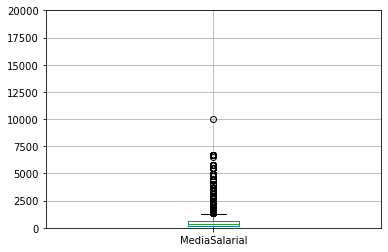

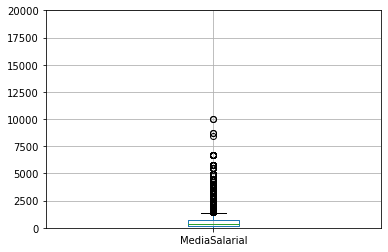

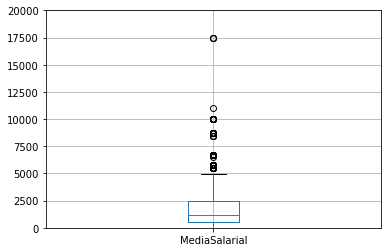

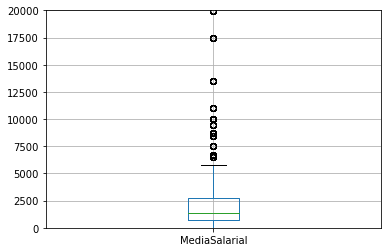

In [ ]:
for index,g in enumerate(Grupos):
    ax = g.boxplot(column = 'MediaSalarial', return_type = 'axes')
    ax.set_ylim(0, 20000)
    plt.show()

In [ ]:
enumerate(Grupos)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f70d3edab30>,
 'caps': [<matplotlib.lines.Line2D at 0x7f70d3edb0d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f70d3ed97b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f70d3edb670>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f70d3edb940>],
 'means': []}

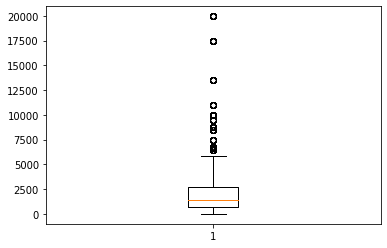

In [ ]:
plt.boxplot(Surdos['MediaSalarial'])

[Text(1, 0, 'ND'),
 Text(2, 0, 'DF'),
 Text(3, 0, 'MD'),
 Text(4, 0, 'DYx'),
 Text(5, 0, 'AD')]

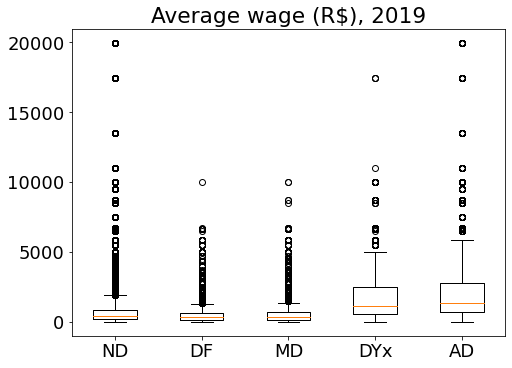

In [ ]:
fig = plt.figure(constrained_layout=True, figsize=(7,5))
g_ND = FinalData[(FinalData[Condicoes] == 0).all(1)]
box = [g_ND['MediaSalarial'], Grupos[0]['MediaSalarial'],Grupos[1]['MediaSalarial'], Grupos[2]['MediaSalarial'], Grupos[3]['MediaSalarial']]
ax = plt.subplot()
ax.set_title('Average wage (R$), 2019')
#ax.set_xticks([1, 2, 3, 4], ['DF', 'MD', 'DYx', 'AD'])
ax.boxplot(box)
ax.set_xticklabels(['ND', 'DF', 'MD', 'DYx', 'AD'])

<h1> Geração do Heatmap com as porcentagens de presença de cada tipo de deficiencia

In [ ]:
for indicador in ind_especificos:

    dataTest = FinalData[FinalData[indicador] == 1]
    dataTest = dataTest.groupby('SG_UF_RESIDENCIA').count()
    dataTest['NU_INSCRICAO'] = dataTest['NU_INSCRICAO']/dataTest['NU_INSCRICAO'].sum()
    dataTest['SG_UF_RESIDENCIA'] = dataTest.index
    m = folium.Map(
        location = [-14, -51],
            zoom_start = 6
        )

    folium.Choropleth(
        geo_data = 'Brasil.json',
        data = dataTest,
        columns = ['SG_UF_RESIDENCIA', 'NU_INSCRICAO'],
        key_on = 'feature.properties.UF',
        fill_color = 'OrRd',
        bins=[0, 0.05, 0.1, 0.15, 0.2, 0.25]

    ).add_to(m)

    m.save(indicador +'.html')

In [ ]:
dataTest = FinalData[(FinalData[Condicoes] == 0).all(1)].groupby('SG_UF_RESIDENCIA').count()
dataTest['NU_INSCRICAO'] = dataTest['NU_INSCRICAO']/dataTest['NU_INSCRICAO'].sum()
dataTest['SG_UF_RESIDENCIA'] = dataTest.index
m = folium.Map(
    location = [-14, -51],
        zoom_start = 6
    )

folium.Choropleth(
    geo_data = 'Brasil.json',
    data = dataTest,
    columns = ['SG_UF_RESIDENCIA', 'NU_INSCRICAO'],
    key_on = 'feature.properties.UF',
    fill_color = 'OrRd',
    bins=[0, 0.05, 0.1, 0.15, 0.2, 0.25]

).add_to(m)

m.save('Geral' +'.html')

<h1> Heatmap para a media salarial

In [ ]:
for indicador in ind_especificos:

    dataTest = FinalData[FinalData[indicador] == 1]
    dataTest = dataTest.groupby('SG_UF_RESIDENCIA').mean()
    dataTest['SG_UF_RESIDENCIA'] = dataTest.index
    m = folium.Map(
        location = [-14, -51],
            zoom_start = 6
        )

    folium.Choropleth(
        geo_data = 'Brasil.json',
        data = dataTest,
        columns = ['SG_UF_RESIDENCIA', 'MediaSalarial'],
        key_on = 'feature.properties.UF',
        fill_color = 'OrRd',
        bins = [0, 500, 1000, 1500, 2000, 2500]

    ).add_to(m)

    m.save(indicador +'.html')

In [ ]:
dataTest = FinalData.groupby('SG_UF_RESIDENCIA').mean()
dataTest['SG_UF_RESIDENCIA'] = dataTest.index
m = folium.Map(
    location = [-14, -51],
        zoom_start = 6
    )

folium.Choropleth(
    geo_data = 'Brasil.json',
    data = dataTest,
    columns = ['SG_UF_RESIDENCIA', 'MediaSalarial'],
    key_on = 'feature.properties.UF',
    fill_color = 'OrRd',
    bins = [0, 500, 1000, 1500, 2000, 2500]

).add_to(m)

m.save('Geral.html')

ValueError: All values are expected to fall into one of the provided bins (or to be Nan). Please check the `bins` parameter and/or your data.

In [ ]:
FinalData['MediaSalarial'].mean()

722.4907848995912

In [ ]:
AD = FinalData[FinalData['IN_DEFICIT_ATENCAO'] == 1]

In [ ]:
AD_ESTADO = AD.groupby('SG_UF_RESIDENCIA')
AD_ESTADO['MediaSalarial'].mean()

SG_UF_RESIDENCIA
AC    1472.829661
AL    1947.414435
AM    1823.862794
AP    1153.032930
BA    1947.948303
CE    1574.949913
DF    2435.513385
ES    1867.624239
GO    2038.932072
MA    1590.958516
MG    1938.180430
MS    1788.081417
MT    2180.212484
PA    1647.232616
PB    1587.580414
PE    2261.945999
PI    1947.665749
PR    1819.344171
RJ    2466.747721
RN    1994.817810
RO    1640.168519
RR    1443.028498
RS    1994.637525
SC    2069.391885
SE    1978.780676
SP    2276.302017
TO    2128.019266
Name: MediaSalarial, dtype: float64

<h1> Stacked bar Tipo escola

In [ ]:
xaxis = ['ND','DF', 'MD', 'DYx', 'AD']
info = []
dataTest = FinalData[(FinalData[Condicoes] == 0).all(1)]
dataTest = dataTest.groupby('TP_ESCOLA')
dataTest = dataTest['NU_INSCRICAO'].size()
info.append(np.array(dataTest)*100/dataTest.sum())

for ind in ind_especificos:
    dataTest = FinalData[FinalData[ind] == 1].groupby('TP_ESCOLA')
    dataTest = dataTest['NU_INSCRICAO'].count()
    info.append(np.array(dataTest)*100/dataTest.sum())
info = np.transpose(info)

In [ ]:
print(info)

[[7.16871848e+01 6.64628259e+01 6.13163972e+01 5.98994975e+01
  6.94962720e+01]
 [2.27064387e+01 3.02220792e+01 3.25923788e+01 1.36348409e+01
  8.29605383e+00]
 [5.58213627e+00 3.28290956e+00 6.07678984e+00 2.63651591e+01
  2.21240225e+01]
 [2.42401924e-02 3.21853878e-02 1.44341801e-02 1.00502513e-01
  8.36515730e-02]]


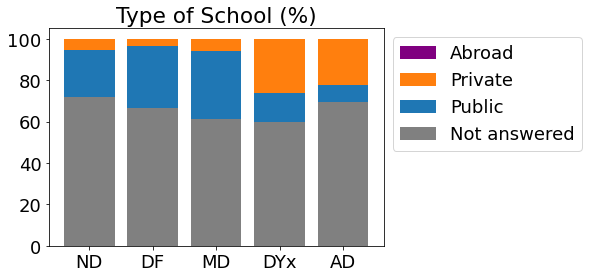

In [ ]:
plt.bar(xaxis, info[0], color = 'gray', label = "Not answered")
plt.bar(xaxis, info[1], bottom = info[0], label = "Public")
plt.bar(xaxis, info[2], bottom = info[0] + info[1], label = "Private")
plt.bar(xaxis, info[3], bottom = info[1] + info[2], color = 'purple', label = "Abroad")
plt.title('Type of School (%)')
#plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
handles, labels = plt.gca().get_legend_handles_labels()
order = [3, 2, 1, 0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], bbox_to_anchor=(1, 1), loc="upper left")


In [ ]:
xaxis = ['ND','DF', 'MD', 'DYx', 'AD']
info = []
dataTest = FinalData[(FinalData[Condicoes] == 0).all(1) & ((FinalData['TP_ESCOLA'] == 2) |  (FinalData['TP_ESCOLA'] == 3))]
dataTest = dataTest.groupby('TP_ESCOLA')
dataTest = dataTest['NU_INSCRICAO'].size()
info.append(np.array(dataTest)*100/dataTest.sum())

for ind in ind_especificos:
    dataTest = FinalData[(FinalData[ind] == 1) & ((FinalData['TP_ESCOLA'] == 2) |  (FinalData['TP_ESCOLA'] == 3))].groupby('TP_ESCOLA')
    dataTest = dataTest['NU_INSCRICAO'].size()
    info.append(np.array(dataTest)*100/dataTest.sum())
info = np.transpose(info)

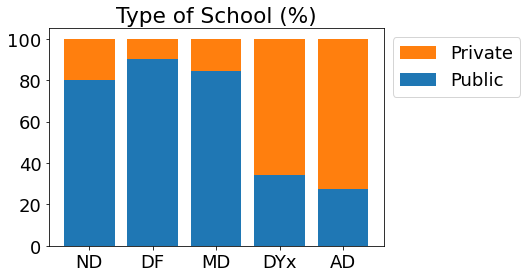

In [ ]:

plt.bar(xaxis, info[0], label = "Public")
plt.bar(xaxis, info[1], bottom = info[0], label = "Private")
plt.title('Type of School (%)')
handles, labels = plt.gca().get_legend_handles_labels()
order = [1, 0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], bbox_to_anchor=(1, 1), loc="upper left")

In [ ]:
for indicador in ind_especificos:

    dataTest = FinalData[FinalData[indicador] == 1]
    total = dataTest[dataTest['TP_ESCOLA'] != 1].groupby('SG_UF_RESIDENCIA').size()
    grouped = dataTest[dataTest['TP_ESCOLA'] == 3].groupby('SG_UF_RESIDENCIA').size()
    dataTest = (grouped/total)
        print(grouped)
        print(total)
    m = folium.Map(
        location = [-14, -51],
            zoom_start = 6
        )

    folium.Choropleth(
        geo_data = 'Brasil.json',
        data = dataTest,
    #       columns = ['SG_UF_RESIDENCIA', 'TP_ESCOLA'],
        key_on = 'feature.properties.UF',
        fill_color = 'OrRd',
        bins=[0, 0.2, 0.4, 0.6, 0.8, 1]


    ).add_to(m)

    m.save(indicador +'.html')

SG_UF_RESIDENCIA
AC     1
AL     5
BA    24
CE     5
DF     2
ES     4
GO     6
MG     7
MS     1
MT     1
PA    10
PB     6
PE     6
PI     2
PR     6
RJ    14
RN     4
RS    21
SC     7
SE    10
SP    61
TO     1
dtype: int64
SG_UF_RESIDENCIA
AC     13
AL     24
AM     37
AP     17
BA    105
CE    316
DF     37
ES     70
GO     90
MA     77
MG    186
MS     44
MT     32
PA     95
PB     42
PE    161
PI     24
PR    135
RJ     91
RN     39
RO     18
RR      3
RS     87
SC     62
SE     22
SP    233
TO     24
dtype: int64
SG_UF_RESIDENCIA
AL    11
AM     1
AP     1
BA    40
CE    33
DF     7
ES    12
GO    21
MA     7
MG    38
MS     2
MT     6
PA    23
PB    14
PE    25
PI     9
PR    10
RJ    42
RN    21
RO     1
RS    16
SC     7
SE    13
SP    59
TO     2
dtype: int64
SG_UF_RESIDENCIA
AC     34
AL     34
AM     28
AP     28
BA     93
CE    419
DF    108
ES    169
GO    271
MA     66
MG    222
MS     51
MT     38
PA    105
PB     41
PE     79
PI     33
PR     67
RJ    127
RN     72


In [ ]:
dataTest = FinalData[(FinalData[Condicoes] == 0).all(1)]
total = dataTest[dataTest['TP_ESCOLA'] != 1].groupby('SG_UF_RESIDENCIA').size()
grouped = dataTest[dataTest['TP_ESCOLA'] == 3].groupby('SG_UF_RESIDENCIA').size()
dataTest = (grouped/total)
print(dataTest)
m = folium.Map(
    location = [-14, -51],
        zoom_start = 6
    )

folium.Choropleth(
    geo_data = 'Brasil.json',
    data = dataTest,
#       columns = ['SG_UF_RESIDENCIA', 'TP_ESCOLA'],
    key_on = 'feature.properties.UF',
    fill_color = 'OrRd',
    bins=[0, 0.2, 0.4, 0.6, 0.8, 1]


).add_to(m)

m.save('Geral' +'.html')

SG_UF_RESIDENCIA
AC    0.073578
AL    0.256810
AM    0.080196
AP    0.114445
BA    0.176832
CE    0.114069
DF    0.289978
ES    0.144106
GO    0.199470
MA    0.111977
MG    0.161731
MS    0.158969
MT    0.144724
PA    0.173837
PB    0.224457
PE    0.177810
PI    0.177652
PR    0.215465
RJ    0.317339
RN    0.222982
RO    0.074191
RR    0.117264
RS    0.169749
SC    0.212056
SE    0.263091
SP    0.248518
TO    0.094611
dtype: float64


In [ ]:
t = FinalData[FinalData['IN_SURDEZ'] == 1]
t.groupby('TP_ESCOLA').count()

,NU_INSCRICAO,SG_UF_RESIDENCIA,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,MediaSalarial
TP_ESCOLA,,,,,,,,,,,,,,
1,4130,4130,4130,4130,4130,4130,4130,4130,4130,4130,4130,4130,4130,4130
2,1878,1878,1878,1878,1878,1878,1878,1878,1878,1878,1878,1878,1878,1878
3,204,204,204,204,204,204,204,204,204,204,204,204,204,204
4,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [ ]:
#colocar nd primeiro - Feito
#aumentar o tamanho - Feito
#abreviatura na frente - Feito
#Average wage (R$), 2019 - Feito
#Trocar ordem rotulo e colocar ele externo
#Fazer o percentual de escolas privadas - Feito
#Replotar o grafico 9 ignorando pessoas q nao responderam | duas versões - Feito
#Passar os graficos

,NU_INSCRICAO,SG_UF_RESIDENCIA,TP_ESCOLA,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,MediaSalarial
338,190001042851,PA,1,0,0,0,0,0,0,0,1,0,0,0,166.333333
865,190001779834,GO,1,0,0,0,0,0,0,0,1,0,0,0,0.000000
1323,190001259259,MG,1,0,0,0,0,0,0,0,1,0,0,0,561.250000
4458,190001676333,ES,1,0,0,0,0,0,0,0,1,0,0,0,103.916667
5822,190001497416,RN,3,0,0,0,0,0,0,0,1,0,0,0,1097.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23397422,150007496779,MG,1,0,0,0,0,0,0,0,1,0,0,0,499.000000
23402999,150007592919,DF,1,0,0,0,0,0,0,0,1,1,0,0,449.000000
23403147,150007575168,GO,1,0,0,0,0,0,0,0,1,0,0,0,207.833333
23407941,150007610241,PB,1,0,0,0,0,0,0,0,1,0,0,0,3326.666667


In [ ]:
Realmente = FinalData[FinalData['IN_DEFICIT_ATENCAO'] == 1]


In [ ]:
Realmente[Realmente['TP_ESCOLA'] == 3].groupby('SG_UF_RESIDENCIA').count()

,NU_INSCRICAO,TP_ESCOLA,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,MediaSalarial
SG_UF_RESIDENCIA,,,,,,,,,,,,,,
AC,9,9,9,9,9,9,9,9,9,9,9,9,9,9
AL,70,70,70,70,70,70,70,70,70,70,70,70,70,70
AM,19,19,19,19,19,19,19,19,19,19,19,19,19,19
AP,5,5,5,5,5,5,5,5,5,5,5,5,5,5
BA,314,314,314,314,314,314,314,314,314,314,314,314,314,314
CE,280,280,280,280,280,280,280,280,280,280,280,280,280,280
DF,237,237,237,237,237,237,237,237,237,237,237,237,237,237
ES,178,178,178,178,178,178,178,178,178,178,178,178,178,178
GO,320,320,320,320,320,320,320,320,320,320,320,320,320,320


In [ ]:
Realmente[Realmente['TP_ESCOLA'] != 1].groupby('SG_UF_RESIDENCIA').count()

,NU_INSCRICAO,TP_ESCOLA,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,MediaSalarial
SG_UF_RESIDENCIA,,,,,,,,,,,,,,
AC,21,21,21,21,21,21,21,21,21,21,21,21,21,21
AL,79,79,79,79,79,79,79,79,79,79,79,79,79,79
AM,27,27,27,27,27,27,27,27,27,27,27,27,27,27
AP,13,13,13,13,13,13,13,13,13,13,13,13,13,13
BA,379,379,379,379,379,379,379,379,379,379,379,379,379,379
CE,407,407,407,407,407,407,407,407,407,407,407,407,407,407
DF,373,373,373,373,373,373,373,373,373,373,373,373,373,373
ES,278,278,278,278,278,278,278,278,278,278,278,278,278,278
GO,532,532,532,532,532,532,532,532,532,532,532,532,532,532


In [ ]:
Realmente

,NU_INSCRICAO,SG_UF_RESIDENCIA,TP_ESCOLA,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,MediaSalarial
338,190001042851,PA,1,0,0,0,0,0,0,0,1,0,0,0,166.333333
865,190001779834,GO,1,0,0,0,0,0,0,0,1,0,0,0,0.000000
1323,190001259259,MG,1,0,0,0,0,0,0,0,1,0,0,0,561.250000
4458,190001676333,ES,1,0,0,0,0,0,0,0,1,0,0,0,103.916667
5822,190001497416,RN,3,0,0,0,0,0,0,0,1,0,0,0,1097.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23397422,150007496779,MG,1,0,0,0,0,0,0,0,1,0,0,0,499.000000
23402999,150007592919,DF,1,0,0,0,0,0,0,0,1,1,0,0,449.000000
23403147,150007575168,GO,1,0,0,0,0,0,0,0,1,0,0,0,207.833333
23407941,150007610241,PB,1,0,0,0,0,0,0,0,1,0,0,0,3326.666667


In [ ]:
#Fazer o segundo grafico considerando 100% do grupo sendo apenas o privado e publico - feito
#Verificar se existe estudantes com aquela deficiencia em cada estado - feito
#Corrigir a cor nan -
#Fazer redação direcionada e antes dos outliers

<h1> Notas redação
   

In [ ]:
Competencias = ['NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5']
FinalData = pd.read_csv('AllYears.csv', usecols = ['NU_INSCRICAO'] + Competencias + Condicoes)

In [ ]:
def survey(results, category_names):

    res = {}

    labels = list(results.keys())

    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['GnBu'](
        np.linspace(0.15, 0.75, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.1 else 'black'

        ax.bar_label(rects, fmt='%.1f', labels=[f'{x:.0%}' for x in widths], label_type='center', color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax




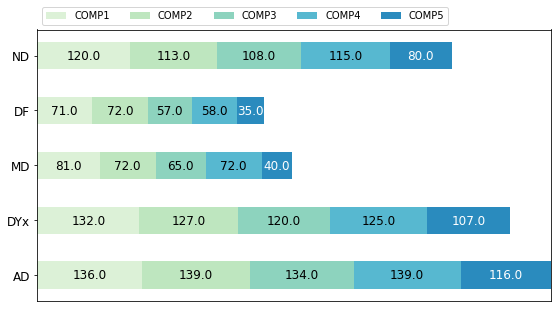

In [ ]:
results = {}
disGrouped = FinalData[(FinalData[Condicoes] == 0).all(1)]
meanComp = np.array(round(disGrouped[Competencias].mean()))
tempDict = {'ND': meanComp}
results.update(tempDict)
labeledDis = ['DF', 'MD', 'DYx', 'AD']
i = 0
for ind in ind_especificos:
    disGrouped = FinalData[FinalData[ind] == 1]
    meanComp = np.array(round(disGrouped[Competencias].mean()))
    tempDict = {labeledDis[i]: meanComp}
    results.update(tempDict)
    i +=1
category_names = ['COMP1', 'COMP2',
                  'COMP3', 'COMP4', 'COMP5']
survey(results, category_names)
plt.rcParams.update({'font.size':12})
plt.show()

In [ ]:
meanComp

array([136., 139., 134., 139., 116.])

In [ ]:
#Apresentar as duas imagens do tipo de escola uma na frente da outra - Feito
#Grafico de barra + stacked proporcional - Feito
#Analise dos temas gerais

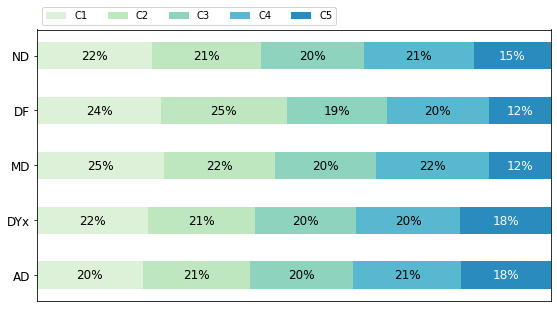

In [ ]:
results = {}
disGrouped = FinalData[(FinalData[Condicoes] == 0).all(1)]
meanComp = np.array(disGrouped[Competencias].mean())
meanComp = meanComp/meanComp.sum()
tempDict = {'ND': meanComp}
results.update(tempDict)
labeledDis = ['DF', 'MD', 'DYx', 'AD']
i = 0
for ind in ind_especificos:
    disGrouped = FinalData[FinalData[ind] == 1]
    meanComp = np.array((disGrouped[Competencias].mean()))
    meanComp = meanComp/meanComp.sum()
    tempDict = {labeledDis[i]: meanComp}
    results.update(tempDict)
    i += 1
category_names = ['C1', 'C2',
                  'C3', 'C4', 'C5']
survey(results, category_names)
plt.rcParams.update({'font.size':12})
plt.show()

In [ ]:
TemasGerais = [
2015: A persistência da violência contra a mulher na sociedade brasileira
2016: Caminhos para combater a intolerância religiosa no Brasil
2018: Manipulação do comportamento do usuário pelo controle de dados na internet
]

TemasEspecificos = [
2017: Desafios para a formação educacional de surdos no Brasil
2019: Democratização do acesso ao cinema no Brasil
]

In [ ]:
essay2017 = pd.read_csv(paths[2], usecols = ['NU_INSCRICAO'] + Competencias + Condicoes)

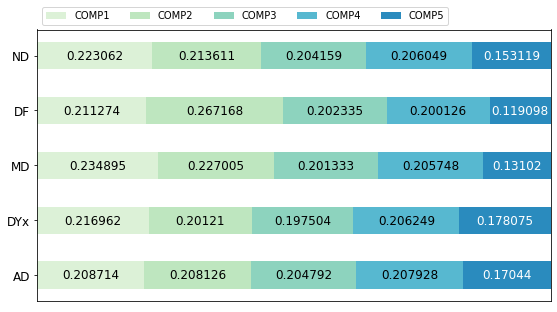

In [ ]:
results = {}
disGrouped = essay2017[(essay2017[Condicoes] == 0).all(1)]
meanComp = np.array(round(disGrouped[Competencias].mean()))
meanComp = meanComp/meanComp.sum()
tempDict = {'ND': meanComp}
results.update(tempDict)
labeledDis = ['DF', 'MD', 'DYx', 'AD']
i = 0
for ind in ind_especificos:
    disGrouped = essay2017[essay2017[ind] == 1]
    meanComp = np.array((disGrouped[Competencias].mean()))
    meanComp = meanComp/meanComp.sum()
    tempDict = {labeledDis[i]: meanComp}
    results.update(tempDict)
    i += 1
category_names = ['COMP1', 'COMP2',
                  'COMP3', 'COMP4', 'COMP5']
survey(results, category_names)
plt.rcParams.update({'font.size':12})
plt.show()

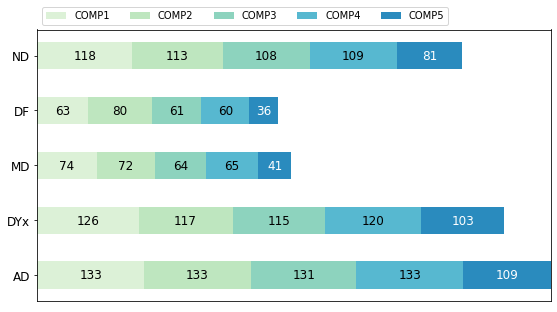

In [ ]:
results = {}
disGrouped = essay2017[(essay2017[Condicoes] == 0).all(1)]
meanComp = np.array(round(disGrouped[Competencias].mean()))
tempDict = {'ND': meanComp}
results.update(tempDict)
labeledDis = ['DF', 'MD', 'DYx', 'AD']
i = 0
for ind in ind_especificos:
    disGrouped = essay2017[essay2017[ind] == 1]
    meanComp = np.array(round(disGrouped[Competencias].mean()))
    tempDict = {labeledDis[i]: meanComp}
    results.update(tempDict)
    i +=1
category_names = ['C1', 'C2',
                  'C3', 'C4', 'C5']
survey(results, category_names)
plt.rcParams.update({'font.size':12})
plt.show()

In [ ]:
#Transformar o stacked horizontal num grafico de barra simples com as medias - feito
#Colocar o percentual no grafico e tentar dar um round e deixar *100 (%) - feito
#Grammarly - Feito
#Padronizar/Trocar competencia por CI, CII - feito
#Apresentar a diferença do ano de 2017 em forma textual
#Refazer os graficos por ano - feito
#Fundo da celula colorido pra smeantico sintatico - feito
#background

<BarContainer object of 5 artists>

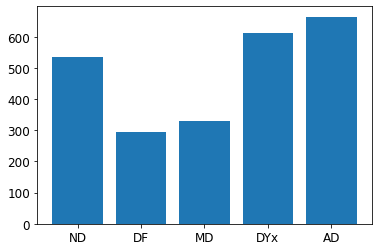

In [ ]:
results = {}
disGrouped = FinalData[(FinalData[Condicoes] == 0).all(1)]
meanComp = np.array(round(disGrouped[Competencias].mean())).sum()
tempDict = {'ND': meanComp}
results.update(tempDict)
labeledDis = ['DF', 'MD', 'DYx', 'AD']
i = 0
for ind in ind_especificos:
    disGrouped = FinalData[FinalData[ind] == 1]
    meanComp = np.array(round(disGrouped[Competencias].mean())).sum()
    tempDict = {labeledDis[i]: meanComp}
    results.update(tempDict)
    i +=1
xArray = list(results.keys())
values = list(results.values())
plt.rcParams.update({'font.size':12})
plt.bar(xArray, values)

<h1> Refazendo graficos ano a ano

2019


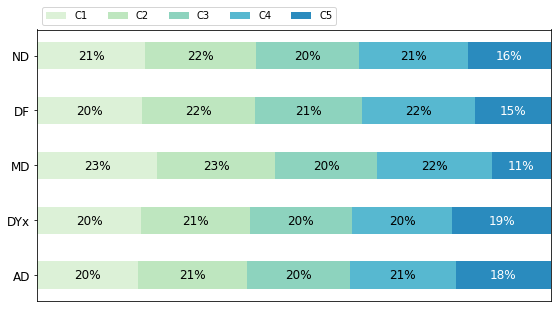

2018


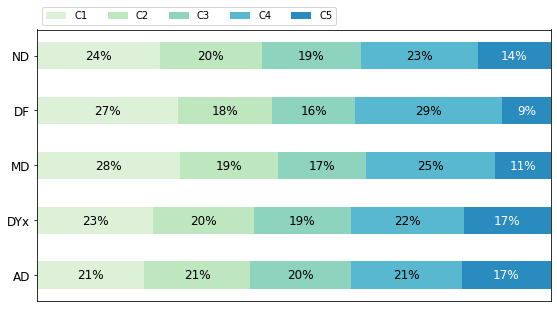

2017


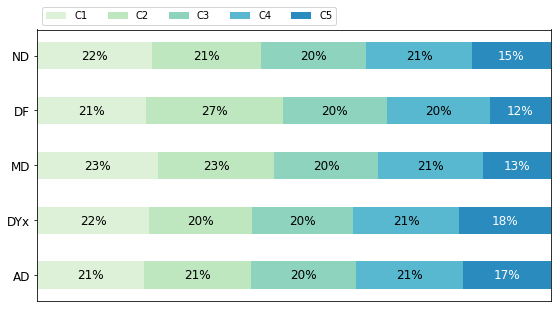

2016


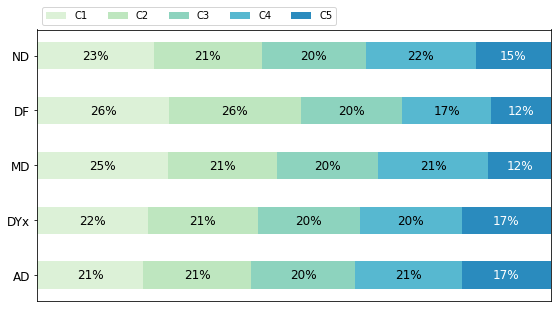

2015


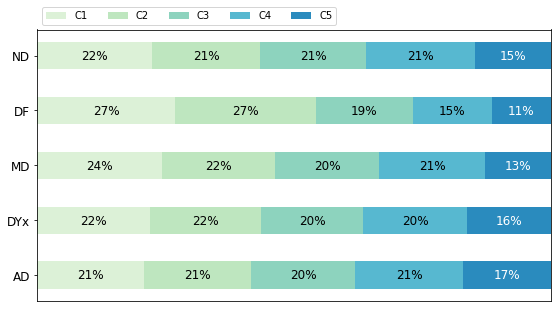

In [ ]:
j = 2019
for path in paths:

    essaySpecific = pd.read_csv(path, usecols = ['NU_INSCRICAO'] + Competencias + Condicoes)
    results = {}
    disGrouped = essaySpecific[(essaySpecific[Condicoes] == 0).all(1)]
    meanComp = np.array(round(disGrouped[Competencias].mean()))
    meanComp = meanComp/meanComp.sum()
    tempDict = {'ND': meanComp}
    results.update(tempDict)
    labeledDis = ['DF', 'MD', 'DYx', 'AD']
    i = 0
    for ind in ind_especificos:
        disGrouped = essaySpecific[essaySpecific[ind] == 1]
        meanComp = np.array((disGrouped[Competencias].mean()))
        meanComp = meanComp/meanComp.sum()
        tempDict = {labeledDis[i]: meanComp}
        results.update(tempDict)
        i += 1
    category_names = ['C1', 'C2',
                      'C3', 'C4', 'C5']
    survey(results, category_names)
    plt.rcParams.update({'font.size':12})
    print(j)
    j -= 1
    plt.show()

In [ ]:
#Background e abstract
#Ter um pequeno resumo das análises feitas

In [ ]:
#Politicas publicas
#Limitações

//Introducao
#Reexplicar o que é o ENEM
#Colocar tudo no presente
#Colocar os resultados
#Colocar a estrutura das demais seções
//


//Feito
#Inverter a ordem no abstract: Colocar que primeiro eles tem melhor desempenho, depois melhor renda
#Centralizar as table I e II
//300 palavras

In [ ]:
#adicionar que estudos enem sao raros
http://costalima.ufrrj.br/index.php/FORMOV/article/view/957/1108
https://www.youtube.com/watch?v=yFK_A8dRddk&ab_channel=Ag%C3%AAnciaFAPESP
#Analises recentes - Feito

#outro related work - Feito
#Linhas sem ser com só uma palavra - Encaminhado
#Referenciar e explicar a figura 9 - Feito

In [ ]:
#Colocar mais related work e reler.
#Sessao 3: Desenvolvimento entre os relatorios
#Sessao 4: Conclusao

Plenty of heuristics
+1 related work